In [43]:
import sys, os

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import statsmodels.api as sm
from scipy.stats import spearmanr, shapiro, norm, probplot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [45]:
data_file = os.path.join(os.getcwd(), 'data', 'winequality-red.csv')

try:
    df = pd.read_csv(data_file)
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {data_file}")
    print("Please check the path and ensure the file exists.")
    
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if path2add not in sys.path:
    sys.path.append(path2add)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [46]:
from utils.utils import normality_check, bootstrap_spearman

In [47]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [48]:
df.shape

(1599, 12)

In [49]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [50]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [51]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
4               7.4             0.700         0.00            1.90      0.076  \
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
4                    11.0                  34.0  0.99780  3.51       0.56  \
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

There is 240 duplicates but assuming that none of these\
wines have a labour duplicates are not removed based on \
assumption that wines might be different maker but with same\
chemical identifications.

In [52]:
wine = df
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [53]:
quality_count= wine['quality'].value_counts()
quality_count

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [54]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### EDA

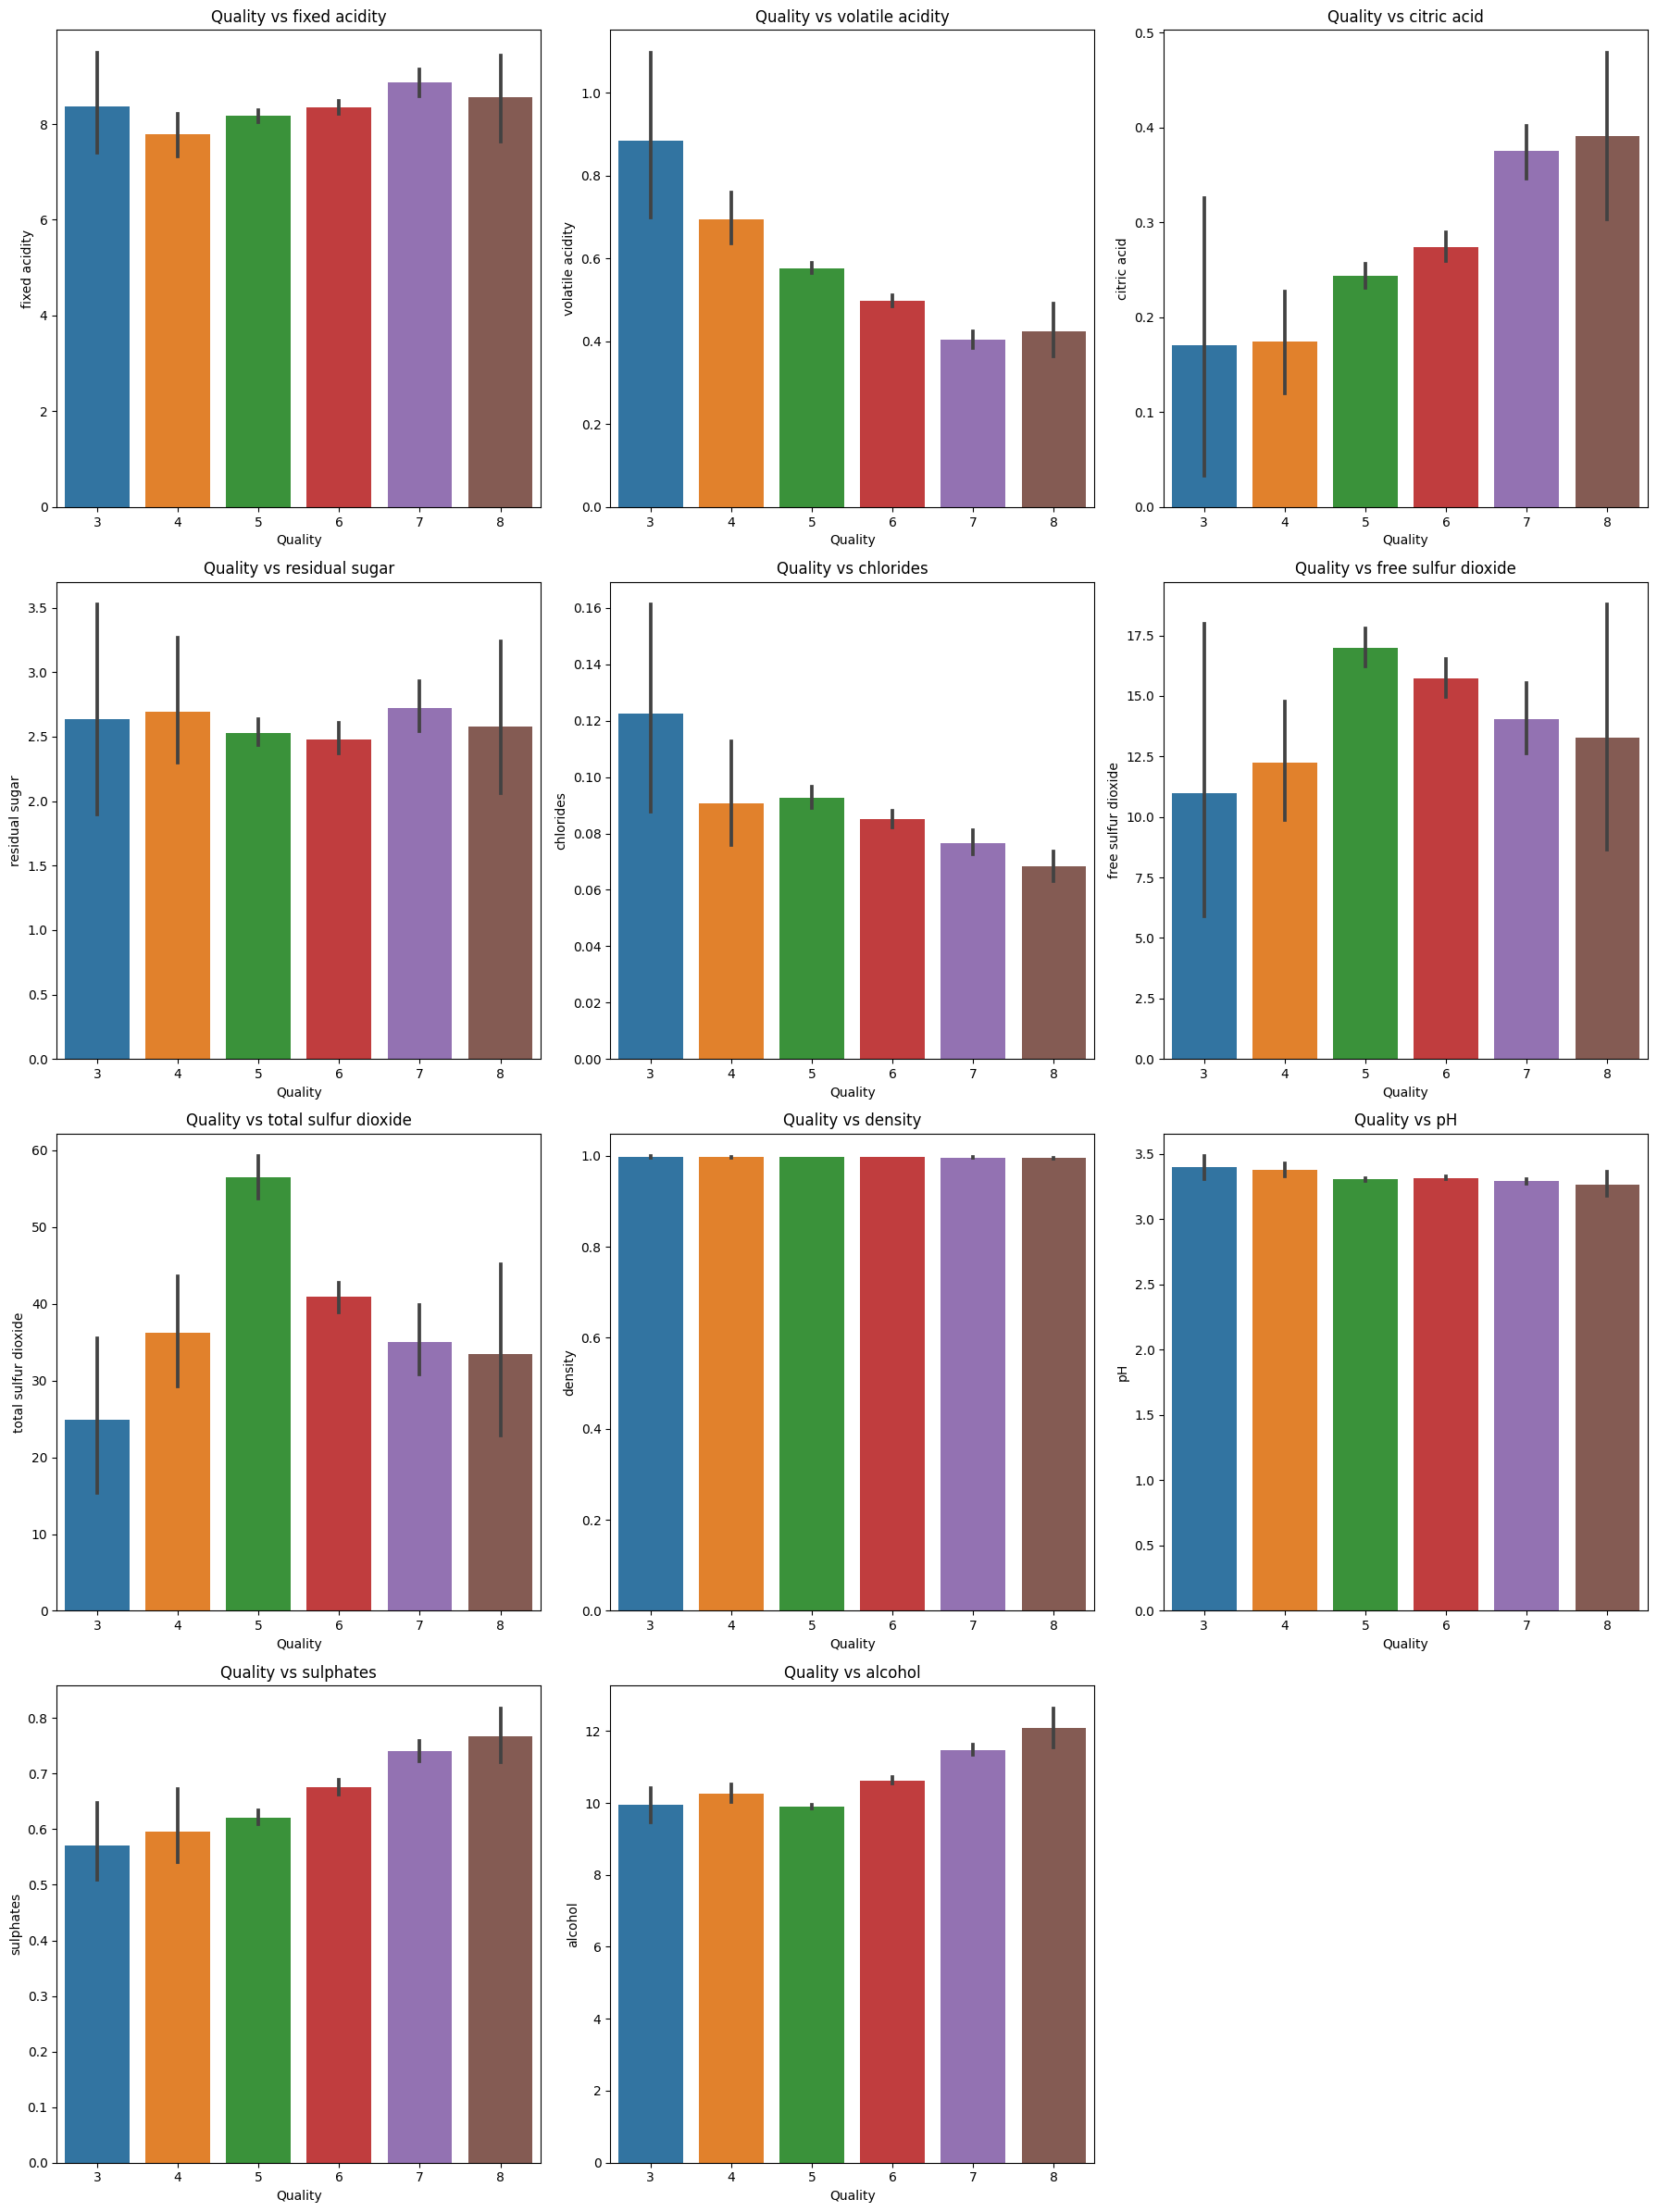

In [56]:
features = wine.columns.tolist()
features.remove('quality')

num_features = len(features)

fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(18, 6 * ((num_features // 3) + 1)))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=wine, ax=axes[i])
    axes[i].set_title(f'Quality vs {feature}')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [57]:
quality_counts = wine['quality'].value_counts()
quality_counts

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

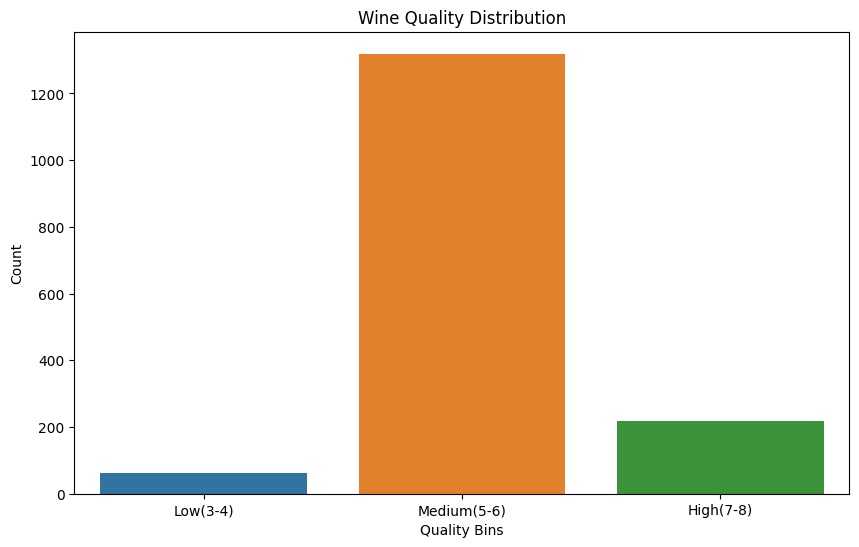

In [58]:
bins = [2, 4, 6, 8]
labels = ['Low(3-4)', 'Medium(5-6)', 'High(7-8)']

wine['quality_bin'] = pd.cut(wine['quality'], bins=bins, labels=labels, right=True, include_lowest=True)
wine['quality_bin'] = wine['quality_bin'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(x=wine['quality_bin'])
plt.xlabel('Quality Bins')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')
plt.show()

- The distribution is heavily skewed towards the "Medium" quality bin (5-6), which has the highest count by a significant margin.
- The "Low" quality bin (3-4) has the fewest wines, indicating that wines rated in this category are relatively rare in the dataset.
- The "High" quality bin (7-8) has a moderate count, much lower than the "Medium" bin but higher than the "Low" bin.

In [59]:
manual_map = {'Low(3-4)': 0, 'Medium(5-6)': 1, 'High(7-8)': 2}
wine['quality_mapped'] = wine['quality_bin'].map(manual_map)
wine['quality_mapped'].value_counts()

quality_mapped
1    1319
2     217
0      63
Name: count, dtype: int64

In [60]:
bins = (2, 5, 8)
group_names = ['good', 'bad']
wine['quality_good_bad'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  quality_bin quality_mapped quality_good_bad  
0         9.4        5  Medium(5-6)              1             good  
1         9.8        5  Medium(5-6)              1             good  
2         9.8        5  Medium(5-6)              1             good  
3         9.8        6  Medium(5-6)              1              bad  
4         9.4        5  Medium(5-6)              1             good  
...       ...      ...          ...            ...              ...  
1594     10.5        5  Medium(5-6)              1             good  
1595     11.2        6  Medium(5-6)              1              bad  
1596     11.0        6  Medium(5-6)              1              bad  
1597     10.2        5  Medium(5-6)              1             good  
1598     11.0        6  Medium(5-6)              1              bad  

[1599 rows x 15 columns]

In [61]:
wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Values been mapped to 0,1 and 2 for further analysis 

In [62]:
label_quality = LabelEncoder()
wine['quality_good_bad'] = label_quality.fit_transform(wine['quality_good_bad'])
wine['quality_good_bad'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Wine quality')
plt.ylabel('')
plt.show()

Wine quality been categorized into two groups: 0 (which we can assume represents "bad" quality)\
and 1 (which we can assume represents "good" quality).

The proportions are fairly close to each other, indicating that the dataset is relatively balanced.

### Distributions

In [63]:
feature_list = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_list):
    plt.subplot(4, 3, i + 1)
    sns.histplot(wine[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From graphics above we are able to say that features are not normal distributed.\
For further analysis features have to be as much as possible close to normal distribution. 

The `normality_check` function is designed to check the normality of a set\
of features in a dataset using the Shapiro-Wilk test. If the p-value is less\
than 0.05, the feature is considered to not be normally distributed 

In [64]:
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

normality_results_before = normality_check(wine, features)
normality_results_before

{'fixed acidity': 'Not Normal',
 'volatile acidity': 'Not Normal',
 'citric acid': 'Not Normal',
 'residual sugar': 'Not Normal',
 'chlorides': 'Not Normal',
 'free sulfur dioxide': 'Not Normal',
 'total sulfur dioxide': 'Not Normal',
 'density': 'Not Normal',
 'pH': 'Not Normal',
 'sulphates': 'Not Normal',
 'alcohol': 'Not Normal'}

As mentioned before we can see that none of the features are\
normal distributed.

### Log Transformation

Log transformation is a widely-used technique in data preprocessing to stabilize variance,\
make the data more normally distributed and reduce the skewness of data.

In [65]:
X_log_transformed_all = np.log1p(wine[features])

In [66]:
X_log_transformed_all

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0          2.128232          0.530628     0.000000        1.064711   0.073250  \
1          2.174752          0.631272     0.000000        1.280934   0.093490   
2          2.174752          0.565314     0.039221        1.193922   0.088011   
3          2.501436          0.246860     0.444686        1.064711   0.072321   
4          2.128232          0.530628     0.000000        1.064711   0.073250   
...             ...               ...          ...             ...        ...   
1594       1.974081          0.470004     0.076961        1.098612   0.086178   
1595       1.931521          0.438255     0.095310        1.163151   0.060154   
1596       1.987874          0.412110     0.122218        1.193922   0.073250   
1597       1.931521          0.497740     0.113329        1.098612   0.072321   
1598       1.945910          0.270027     0.385262        1.526056   0.064851   

      free sulfur dioxide  total sulfur dioxide   density        pH   
0                2.484907              3.555348  0.692047  1.506297  \
1                3.258097              4.219508  0.691546  1.435085   
2                2.772589              4.007333  0.691646  1.449269   
3                2.890372              4.110874  0.692147  1.425515   
4                2.484907              3.555348  0.692047  1.506297   
...                   ...                   ...       ...       ...   
1594             3.496508              3.806662  0.690594  1.492904   
1595             3.688879              3.951244  0.690704  1.508512   
1596             3.401197              3.713572  0.691015  1.486140   
1597             3.496508              3.806662  0.690880  1.519513   
1598             2.944439              3.761200  0.690890  1.479329   

      sulphates   alcohol  
0      0.444686  2.341806  
1      0.518794  2.379546  
2      0.500775  2.379546  
3      0.457425  2.379546  
4      0.444686  2.341806  
...         ...       ...  
1594   0.457425  2.442347  
1595   0.565314  2.501436  
1596   0.559616  2.484907  
1597   0.536493  2.415914  
1598   0.506818  2.484907  

[1599 rows x 11 columns]

In [67]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(X_log_transformed_all[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [68]:
X_log_transformed_all['quality_good_bad'] = (wine['quality'] > 5).astype(int)

In [69]:
normality_results_after_log = normality_check(X_log_transformed_all, features)

normality_results_after_log

{'fixed acidity': 'Not Normal',
 'volatile acidity': 'Not Normal',
 'citric acid': 'Not Normal',
 'residual sugar': 'Not Normal',
 'chlorides': 'Not Normal',
 'free sulfur dioxide': 'Not Normal',
 'total sulfur dioxide': 'Not Normal',
 'density': 'Not Normal',
 'pH': 'Not Normal',
 'sulphates': 'Not Normal',
 'alcohol': 'Not Normal'}

After Log transformation we are able to see that features become more normal distributed.\
But `normality_check` shows that features are still not normal distributed.

### Yeo-Johnson Transformation

Yeo-Johnson transformation is a statistical technique used to stabilize variance and make the data more normally distributed.\
It helps to stabilize the variance across the dataset, which is important for many statistical models that assume homoscedasticity.

In [70]:
power_transformer_yeojohnson = PowerTransformer(method='yeo-johnson')
X_yeojohnson_transformed = power_transformer_yeojohnson.fit_transform(wine[features])

X_yeojohnson_transformed_df = pd.DataFrame(X_yeojohnson_transformed, columns=features)

In [71]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(X_yeojohnson_transformed_df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [72]:
normality_results_after_yeojohnson = normality_check(X_yeojohnson_transformed_df, features)
normality_results_after_yeojohnson

{'fixed acidity': 'Not Normal',
 'volatile acidity': 'Not Normal',
 'citric acid': 'Not Normal',
 'residual sugar': 'Not Normal',
 'chlorides': 'Not Normal',
 'free sulfur dioxide': 'Not Normal',
 'total sulfur dioxide': 'Not Normal',
 'density': 'Not Normal',
 'pH': 'Not Normal',
 'sulphates': 'Not Normal',
 'alcohol': 'Not Normal'}

After Yeo-Johnson Transformation features distribution looks worse.\
That is why we will stick with Log transformation features data for model.

### Hypothesis testing

- Hypothesis (H1): Higher levels of density have a positive impact on the perceived wine quality.
- Null Hypothesis (H0): There is no significant relationship between the levels of density and the perceived wine quality.

### Shapiro-Wilk Test

In [73]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_log_transformed_all['density'], kde=True)
plt.title('Histogram of density')

plt.subplot(1, 2, 2)
probplot(X_log_transformed_all['density'], dist="norm", plot=plt)
plt.title('Q-Q Plot of density')

plt.show()

stat, p = shapiro(X_log_transformed_all['quality_good_bad'])
print(f'Shapiro-Wilk Test for Quality: Statistics={stat}, p-value={p}')

stat, p = shapiro(X_log_transformed_all['density'])
print(f'Shapiro-Wilk Test for Density: Statistics={stat}, p-value={p}')

Shapiro-Wilk Test for Quality: Statistics=0.6348580121994019, p-value=0.0
Shapiro-Wilk Test for Density: Statistics=0.9908913373947144, p-value=2.0158656965918453e-08


Shapiro-Wilk Test for Quality and Density shows that both data sets are not normal distributed.
Small density p-values shows significance.

### Non-Parametric Correlation
#### (Spearman's rank correlation)

In [74]:
corr, p_value = spearmanr(X_log_transformed_all['density'], X_log_transformed_all['quality_good_bad'])
print(f"Spearman's rank correlation: {corr}, p-value: {p_value}")

Spearman's rank correlation: -0.16436323083437618, p-value: 3.7825966944484004e-11


Spearman's rank correlation of about -0.164 shows negative correlation between quality and density.

### Bootstrapping for Confidence Interval

In [85]:
n_iterations = 1000
n_size = len(X_log_transformed_all)
bootstrap_samples = []

for _ in range(n_iterations):
    sample = X_log_transformed_all.sample(n_size, replace=True)
    corr, _ = spearmanr(sample['density'], sample['quality_good_bad'])
    bootstrap_samples.append(corr)

# Calculate the 95% confidence interval
alpha = 0.95
lower = np.percentile(bootstrap_samples, ((1.0 - alpha) / 2.0) * 100)
upper = np.percentile(bootstrap_samples, (alpha + ((1.0 - alpha) / 2.0)) * 100)

lower, upper

print(f'95% Confidence Interval for Spearman\'s rank correlation: ({lower}, {upper})')

95% Confidence Interval for Spearman's rank correlation: (-0.21007926233207463, -0.11544279587049455)


- Null Hypothesis (H0): There is no significant relationship between the levels of density and the perceived wine quality.
- Alternative Hypothesis (H1): Higher levels of density have a positive impact on the perceived wine quality.

The Shapiro-Wilk test indicated that both the 'quality' and 'density' variables are not normally distributed (p-values < 0.05).

Spearman's Rank Correlation Coefficient: -0.164, suggesting a moderate negative correlation between density and wine quality.\
P-value: very low, indicating that this correlation is statistically significant.\
95% Confidence Interval: (-0.21, -0.115), meaning we are 95% confident that the true correlation lies within this range.

#### Conclusion
The analysis supports rejecting the null hypothesis (H0) in favor of the alternative hypothesis (H1). The alternative\
hypothesis as initially stated suggested a positive impact of higher density on perceived wine quality. However, the\
actual results indicate a statistically significant negative impact.

#### Logistic regression  

In [76]:
X = X_log_transformed_all[['density']]
y = X_log_transformed_all['quality_good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression()
log_reg.fit(X_train_sm, y_train_sm)

y_pred = log_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

print(f'Coefficients: {log_reg.coef_}')
print(f'Intercept: {log_reg.intercept_}')

[[107 106]
 [115 152]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       213
           1       0.59      0.57      0.58       267

    accuracy                           0.54       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.54      0.54      0.54       480

Accuracy: 0.5395833333333333
Coefficients: [[-0.09725585]]
Intercept: [0.06725662]


SMOTE is a method used to handle imbalanced datasets. For each minority class sample,\
SMOTE selects one or more of its nearest neighbors from the same class. The synthetic\
samples are added to the training dataset.

Accuracy of model looks pretty low. Around 54%.

c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


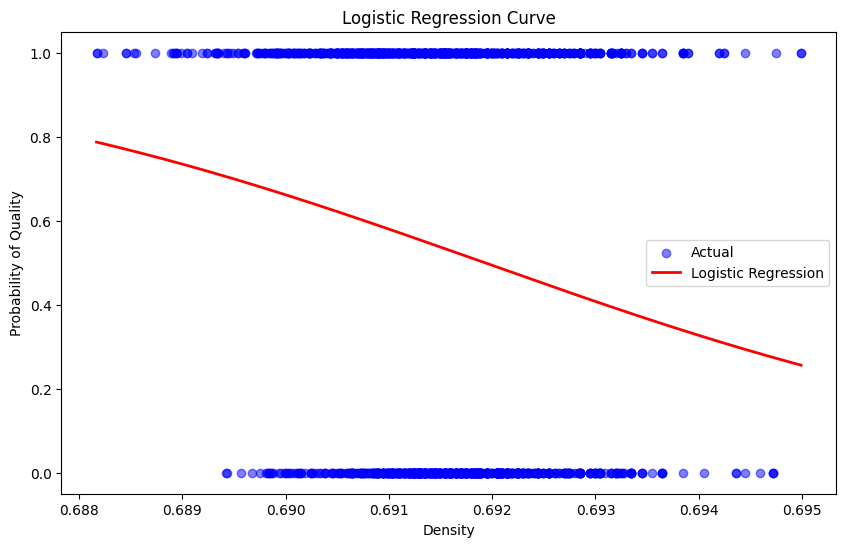

In [77]:
scaler = StandardScaler()
X_density_scaled = scaler.fit_transform(X[['density']])

log_reg = LogisticRegression()

log_reg.fit(X_density_scaled, y)

density_range = np.linspace(X['density'].min(), X['density'].max(), 300).reshape(-1, 1)
density_range_scaled = scaler.transform(density_range)

predicted_probs = log_reg.predict_proba(density_range_scaled)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X['density'], y, color='blue', alpha=0.5, label='Actual')
plt.plot(density_range, predicted_probs, color='red', linewidth=2, label='Logistic Regression')
plt.xlabel('Density')
plt.ylabel('Probability of Quality')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

- The logistic regression curve indicates a negative relationship between density and\
the probability of a wine being classified as good quality.
- As the density increases, the probability of the wine being classified as good quality decreases.

### Model

In [78]:
wine['quality'] = pd.to_numeric(wine['quality'])

X_yeojohnson_transformed_df['quality_good_bad'] = (wine['quality'] > 5).astype(int)

X_yeojohnson_transformed_df.head()
X_yeojohnson_transformed_df['quality_good_bad'].value_counts()

quality_good_bad
1    855
0    744
Name: count, dtype: int64

In [79]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

In [80]:
X = X_log_transformed_all[predictors]  # Predictor
y = X_log_transformed_all['quality_good_bad']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    
model = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model = sm.MNLogit(y_train, X_train)
result = model.fit()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.519950
         Iterations 6
Confusion Matrix:
[[111  30]
 [ 52 127]]


- **True Negatives (111)**: Correctly predicted as class 0.
- **False Positives (30)**: Incorrectly predicted as class 1.
- **False Negatives (52)**: Incorrectly predicted as class 0.
- **True Positives (127)**: Correctly predicted as class 1.

In [81]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(result.summary())


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       141
           1       0.81      0.71      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320

                          MNLogit Regression Results                          
Dep. Variable:       quality_good_bad   No. Observations:                 1279
Model:                        MNLogit   Df Residuals:                     1268
Method:                           MLE   Df Model:                           10
Date:                Wed, 10 Jul 2024   Pseudo R-squ.:                  0.2481
Time:                        09:40:11   Log-Likelihood:                -665.02
converged:                       True   LL-Null:                       -884.45
Covariance Type:            nonrobust   LLR p-value:                 4.936e-88
  quality_good_ba

With a precision of 0.81 for class 1, the model is good at minimizing false positives for this class.\
The f1-scores for both classes (0.73 for class 0 and 0.76 for class 1) indicate a balanced performance, considering both precision and recall.\
An accuracy of 0.74 means the model correctly predicts 74% of the instances, which is generally acceptable for many practical applications.

Looking at the P values trying to make new model with only significant features:
Significant features: `fixed acidity`,`volatile acidity`,`citric acid`,`total sulfur dioxide`,`density`,`sulphates`,`alcohol`

The Variance Inflation Factor (VIF) measures how much the variance\
of a regression coefficient is inflated due to multicollinearity with other predictors.

In [82]:
wine['quality_good_bad'] = (wine['quality'] > 5).astype(int)

numeric_cols = wine.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
correlation_matrix = wine[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(wine, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], 
             hue='quality_good_bad', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Wine Variables', y=1.02)
plt.show()

X = wine[numeric_cols].drop(columns=['quality'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866

Variance Inflation Factor (VIF) helps identify multicollinearity among the features.\
A high VIF value indicates that a feature is highly collinear with other features.\
In this case `pH` and `density` have extremely high values and will not be included in model.

In [83]:
selected_features = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'total sulfur dioxide',
    'sulphates',
    'alcohol'
]
X = X_log_transformed_all[selected_features]  # Predictor
y = X_log_transformed_all['quality_good_bad']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    
model = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model = sm.MNLogit(y_train, X_train)
result = model.fit()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.574040
         Iterations 6
Confusion Matrix:
[[113  28]
 [ 53 126]]


- **True Negatives (113)**: Correctly predicted as class 0.
- **False Positives (28)**: Incorrectly predicted as class 1.
- **False Negatives (53)**: Incorrectly predicted as class 0.
- **True Positives (126)**: Correctly predicted as class 1.

The current model shows a slight improvement in terms of reducing false positives and increasing true negatives.

In [84]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(result.summary())


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       141
           1       0.82      0.70      0.76       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320

                          MNLogit Regression Results                          
Dep. Variable:       quality_good_bad   No. Observations:                 1279
Model:                        MNLogit   Df Residuals:                     1273
Method:                           MLE   Df Model:                            5
Date:                Wed, 10 Jul 2024   Pseudo R-squ.:                  0.1699
Time:                        09:40:52   Log-Likelihood:                -734.20
converged:                       True   LL-Null:                       -884.45
Covariance Type:            nonrobust   LLR p-value:                 7.795e-63
  quality_good_ba

The model shows balanced performance across both classes with a slight improvement in overall accuracy.\
The precision and recall for class 1 are particularly strong, indicating the model's effectiveness in correctly\
identifying positive instances while minimizing false positives. The balanced f1-scores further support the model's\
robustness in handling both classes, making it a reliable choice for predicting wine quality.

### Suggestions
- Collect more data!!!